In [1]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("sparkml").getOrCreate()

In [2]:
spark

In [3]:
agg = spark.read.parquet('s3://502pubg/clean/aggeragate0.parquet')

In [4]:
agg.printSchema()

root
 |-- game_size: integer (nullable = true)
 |-- match_mode: string (nullable = true)
 |-- party_size: integer (nullable = true)
 |-- player_assists: integer (nullable = true)
 |-- player_dbno: integer (nullable = true)
 |-- player_dist_ride: integer (nullable = true)
 |-- player_dist_walk: integer (nullable = true)
 |-- player_dmg: integer (nullable = true)
 |-- player_kills: integer (nullable = true)
 |-- player_survive_time: integer (nullable = true)
 |-- team_placement: integer (nullable = true)



In [5]:
from pyspark.sql.functions import countDistinct

In [6]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [7]:
hist1 = agg.select('game_size').rdd.flatMap(lambda row: row).histogram(100)

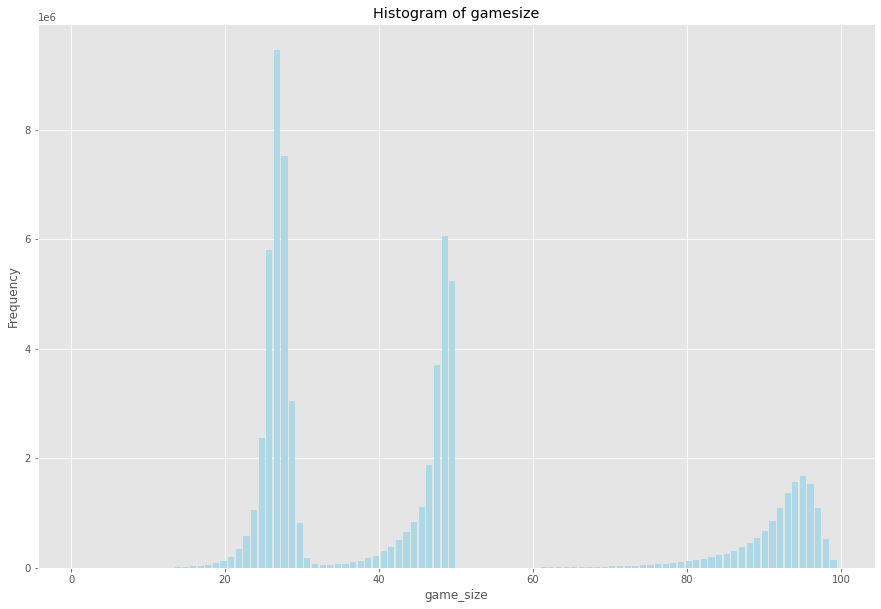

In [10]:
data = {
'bins': hist1[0][:-1],
'freq': hist1[1]
}
plt.figure(figsize=(15,10))
plt.bar(data['bins'], data['freq'],width=0.8,color='lightblue')
plt.xlabel('game_size')
plt.ylabel('Frequency')
plt.title('Histogram of gamesize')
plt.show()
#Bar plot of the gamesize

In [11]:
hist2 = agg.select('team_placement').rdd.flatMap(lambda row: row).histogram(20)

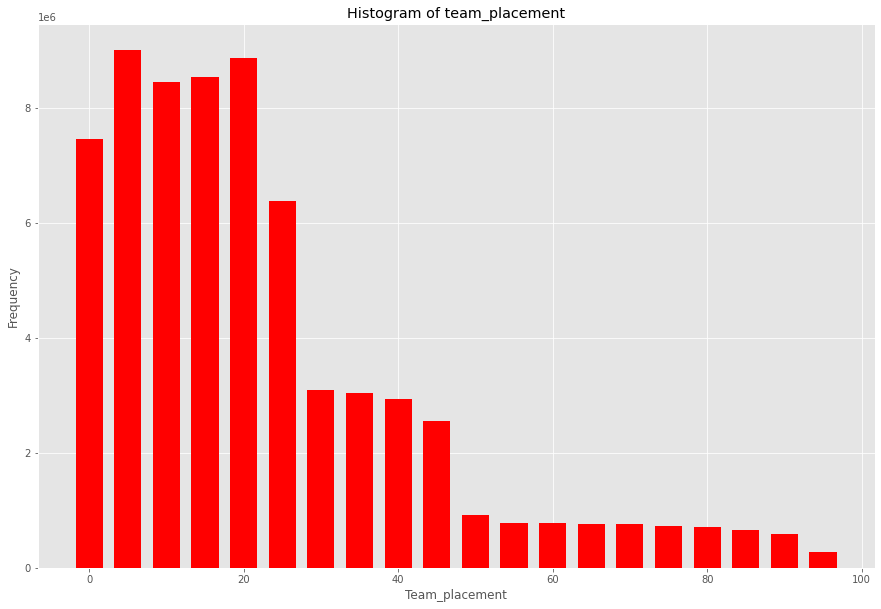

In [12]:
data = {
'bins': hist2[0][:-1],
'freq': hist2[1]
}
plt.figure(figsize=(15,10))
plt.bar(data['bins'], data['freq'],width=3.5,color='red')
plt.xlabel('Team_placement')
plt.ylabel('Frequency')
plt.title('Histogram of team_placement')
plt.show()
#Barplot of the team_placement

In [13]:
agg.select(countDistinct('match_mode')).show()

+--------------------------+
|count(DISTINCT match_mode)|
+--------------------------+
|                         1|
+--------------------------+



In [14]:
df1 = agg.select('party_size','player_survive_time').toPandas()

In [15]:
df2=df1[df1['player_survive_time']<5000]

In [16]:
import pandas as pd
import seaborn as sns
import numpy as np

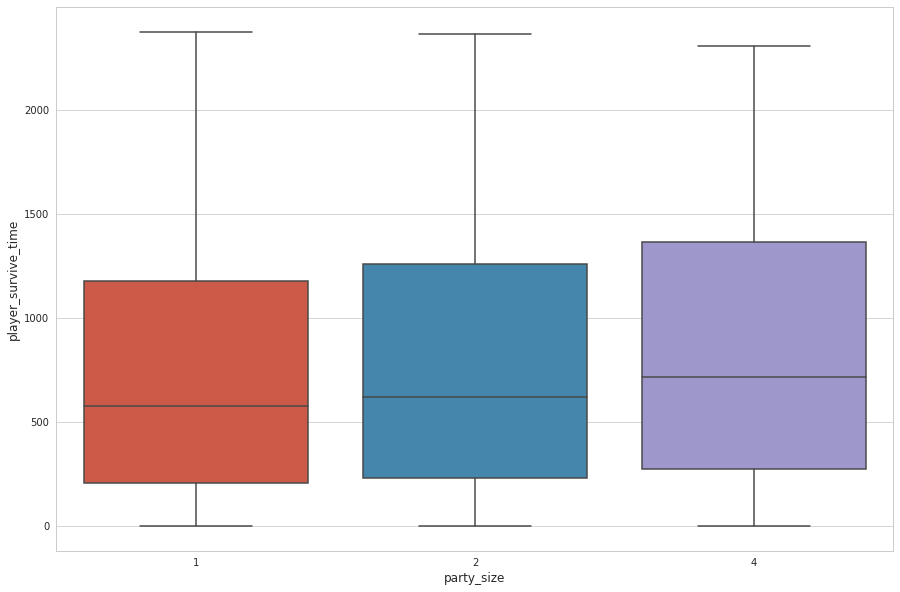

In [17]:
plt.figure(figsize=(15,10))
sns.set_style("whitegrid") 
sns.boxplot(x='party_size',y='player_survive_time',data=df2)
plt.show()
#Boxplot of the partysize vs survive time.

In [18]:
kill = spark.read.parquet('s3://502pubg/clean/kill1.parquet')

In [19]:
kill.printSchema()

root
 |-- killed_by: string (nullable = true)
 |-- killer_placement: double (nullable = true)
 |-- killer_position_x: integer (nullable = true)
 |-- killer_position_y: integer (nullable = true)
 |-- map: string (nullable = true)
 |-- time: integer (nullable = true)
 |-- victim_placement: double (nullable = true)
 |-- victim_position_x: integer (nullable = true)
 |-- victim_position_y: integer (nullable = true)
 |-- DIST: double (nullable = true)
 |-- weaponindex: double (nullable = true)
 |-- mapindex: double (nullable = true)
 |-- features: vector (nullable = true)
 |-- stdfeatures: vector (nullable = true)



In [20]:
dfkill = kill.select('weaponindex','time').toPandas()

In [21]:
dfkill

,weaponindex,time
0,2.0,856
1,0.0,794
2,21.0,1123
3,0.0,190
4,7.0,721
...,...,...
58923971,12.0,170
58923972,4.0,1131
58923973,7.0,1799
58923974,8.0,86


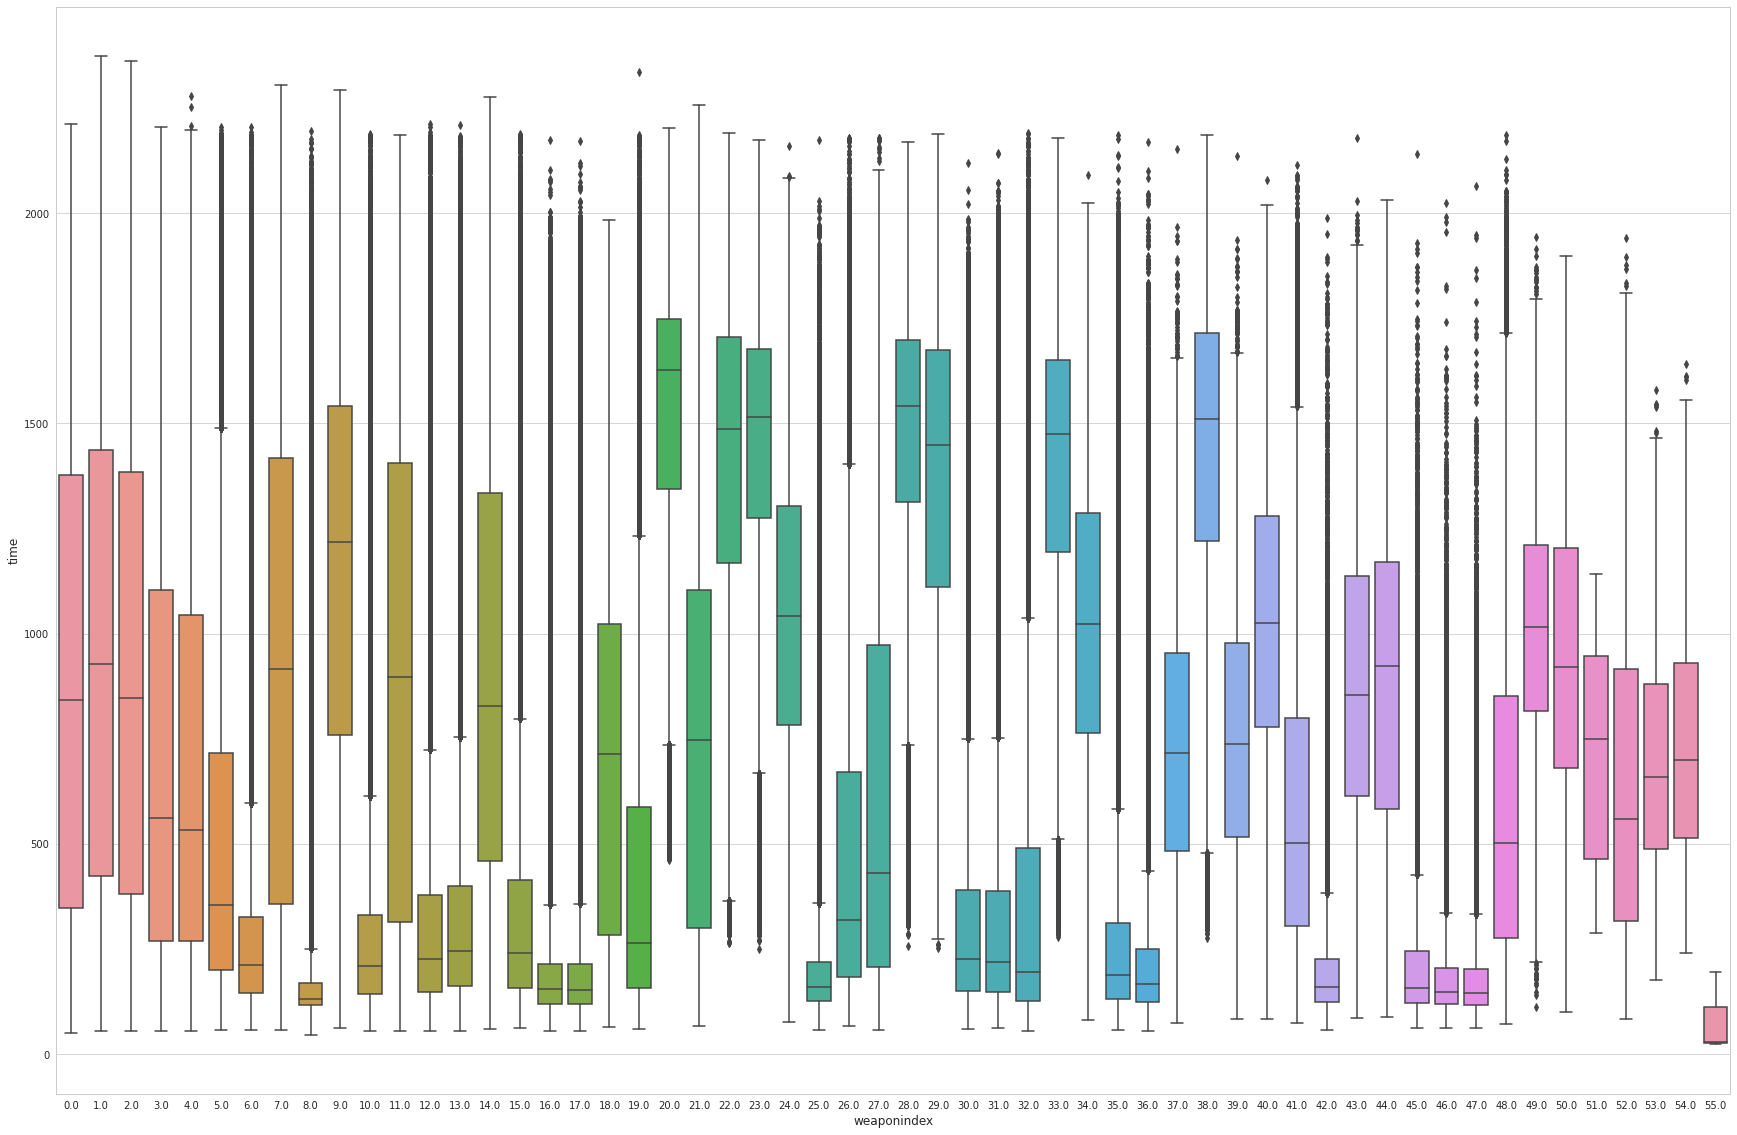

In [25]:
plt.figure(figsize=(30,20))
sns.set_style("whitegrid") 
sns.boxplot(x='weaponindex',y='time',data=dfkill)
plt.show()
#Boxplot of the weapon vs time

In [23]:
time = kill.select('time').toPandas()

Text(0.5, 1.0, 'Density plot of time')

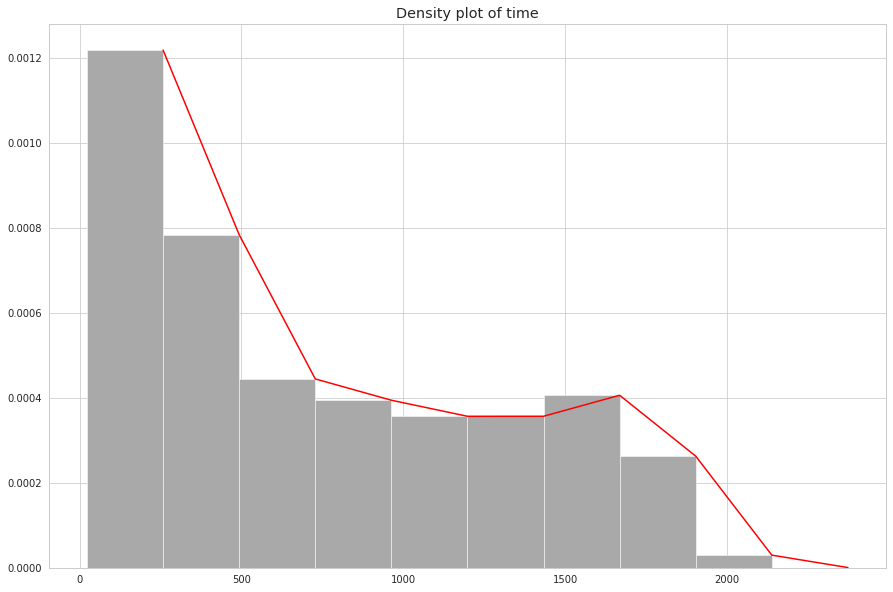

In [24]:
plt.figure(figsize=(15,10))
a=plt.hist(time['time'],density=True,color='darkgrey')
plt.plot(a[1][1:],a[0],color='red')
plt.title('Density plot of time')
#Density plot of the time

In [26]:
spark.stop()